In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

# MNIST Dataset

In [15]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train[0].shape, y_train

((28, 28), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [18]:
# model definition
network = Sequential()
network.add(Dense(units = 128, activation = 'relu',  input_shape = (28*28,)))
network.add(Dense(units = 64, activation = 'relu'))
network.add(Dense(units = 10, activation = 'softmax'))

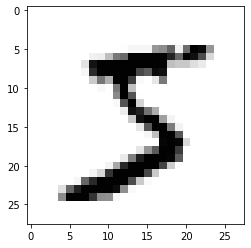

In [19]:
# colored:
# plt.imshow(X_train[0])

# black and white
plt.imshow(X_train[0], cmap=plt.cm.Greys)

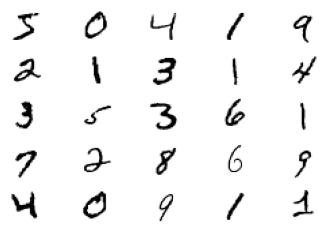

In [20]:
# plot some digits as example
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

## First transformations / preprocessing

In [21]:
#2-dimensional structure (28x28) is transformed to one feature (784)
X_train_flattened = X_train.reshape((60000, 28*28))
X_train_flattened.shape

#similare to X_train_flattened = X_train.reshape((60000, 28*28)) is
#X_train[0].flatten()

(60000, 784)

In [22]:
# need to kind of 'one-hot-encode' the values (0-9) for the output 
from keras.utils import to_categorical
# from keras.utils import np_utils
# np_utils.to_categorical(y_train, num_classes=10)

to_categorical(y_train)

Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
# model definition
network = Sequential()

#input layer
#input_shape must be given only for the input layer (number/shape of features)
network.add(Dense(units = 128, activation = 'relu',  input_shape = (28*28,)))

#hidden layer
network.add(Dense(units = 64, activation = 'relu'))

#output layer
#units must be set to 10 as there are 10 digits to classify (numbers 0-9)
network.add(Dense(units = 10, activation = 'softmax'))

In [24]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Explanations:
- units: neurons (in one layer)
- dense: layer
(if you have only one layer, one unit --> similar to Logistic Regression)
- param: weights (can be calcluated by the number of input weights (w1, w2, ...) plus bias (b))

In [25]:
# optimizer: based on gradient descent (optimizes loss function)
# loss: categorical_crossentropy, binary_crossentropy, (analog to log loss)
# metrics: accuracy, recall, precision (for classification)

network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',    # same as log-loss
              metrics=['accuracy'])

In [26]:
# fit model/network
network.fit(X_train_flattened, to_categorical(y_train), 
            epochs=10, 
            batch_size=1000, 
            validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 1s 13us/sample - loss: 9.1321 - acc: 0.4230 - val_loss: 7.7209 - val_acc: 0.5136
Epoch 2/10
48000/48000 [==============================] - 1s 11us/sample - loss: 7.5847 - acc: 0.5228 - val_loss: 7.5421 - val_acc: 0.5256
Epoch 3/10
48000/48000 [==============================] - 0s 10us/sample - loss: 7.3433 - acc: 0.5388 - val_loss: 7.3826 - val_acc: 0.5363
Epoch 4/10
48000/48000 [==============================] - 0s 10us/sample - loss: 7.2491 - acc: 0.5457 - val_loss: 7.2706 - val_acc: 0.5437
Epoch 5/10
48000/48000 [==============================] - 0s 10us/sample - loss: 6.9457 - acc: 0.5633 - val_loss: 6.3169 - val_acc: 0.5994
Epoch 6/10
48000/48000 [==============================] - 0s 10us/sample - loss: 5.7654 - acc: 0.6356 - val_loss: 4.8303 - val_acc: 0.6913
Epoch 7/10
48000/48000 [==============================] - 0s 10us/sa

In [ ]:
# print training score
score_train = network.evaluate(X_train, y_train, batch_size=4)
print('score_train=', score_train)

In [27]:
# predict model/network
np.round(network.predict(X_test[0].reshape((1, 28*28))),2)

# similar to this
# network.predict(X_test[0].reshape((1, 28*28)))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# print scores
score_test = network.evaluate(X_test, y_test, batch_size=4)
print('score_test=', score_test)
score_pred = network.evaluate(X_test, y_pred, batch_size=4)
print('score_pred=', score_pred)

### Show result and save model

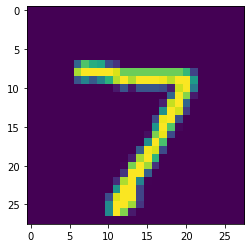

In [28]:
# display result
plt.imshow(X_test[0])

In [ ]:
# in keras: save model as h5 file
network.save('model.h5')